# **Importing Libraries**

In [2]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud, STOPWORDS 
from sklearn.metrics import  f1_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  f1_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 
import pandas as pd 
import re
from xgboost import XGBClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **Mounting Google Drive to read dataset**

In [3]:
from google.colab import drive                       
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading Dataset**

In [4]:
# reading the dataset from google drive                     

dataset=pd.read_csv('/content/drive/MyDrive/nlp/dataset.csv')


In [5]:
dataset.groupby(by='Label').agg('count')

,Head,Body,Features
Label,,,
0,24903,24903,24903
1,268336,268336,268336


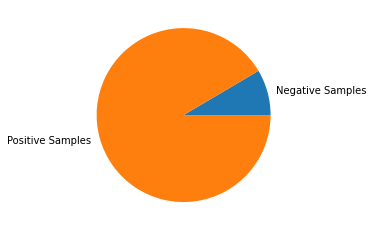

In [6]:
original = np.array([24903,268336])
mylabels1 = ["Negative Samples", "Positive Samples"]

plt.pie(original, labels = mylabels1)
plt.show() 

# **Preprocessing Dataset**

In [7]:
print(dataset.shape)

(293239, 4)


In [8]:
dataset.head()

,Head,Body,Label,Features
0,food snack selection popular greek dishes,underwhelmed main courses tables sometimes har...,0,5.0 4.435897435897436 39 4.0 4.009523809523809...
1,little place soho wonderful,price shocked small serving soho staff little ...,0,3.0 3.0 1 4.0 4.0095238095238095 210 4 3
2,ordered lunch snack last friday,added regular company lunch list everyone enjo...,0,4.0 4.0 2 4.0 4.0095238095238095 210 3 4
3,beautiful quaint little restaurant pretty street,heard reviews lamb sandwich try happy every si...,0,4.0 4.0 1 4.0 4.0095238095238095 210 7 4
4,snack great place casual sit lunch especially ...,avgolemono soup lemony perfection butter bean ...,0,4.0 3.6 5 4.0 4.0095238095238095 210 6 4


In [9]:
print(dataset.isnull().sum())

Head        0
Body        0
Label       0
Features    0
dtype: int64


In [10]:
dataset=dataset.dropna()


In [11]:
dataset=dataset.sort_values(by=['Label'], ascending=True)

In [12]:
dataset=dataset[:50000]

In [13]:
dataset.groupby(by='Label').agg('count')

,Head,Body,Features
Label,,,
0,24903,24903,24903
1,25097,25097,25097


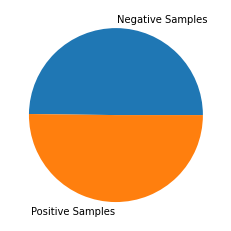

In [14]:
us = np.array([24903,25097])
mylabels2 = ["Negative Samples", "Positive Samples"]

plt.pie(us, labels = mylabels2)
plt.show() 

In [24]:
train=dataset

In [25]:
train['x']=train['Head']+' '+train['Body']

In [26]:
train.head()


,Head,Body,Label,Features,x
0,food snack selection popular greek dishes,underwhelmed main courses tables sometimes har...,0,5.0 4.435897435897436 39 4.0 4.009523809523809...,food snack selection popular greek dishes unde...
20343,deal walkin wait nearly min guarantee well wor...,go long broth bit short noodles meat order dis...,0,5.0 5.0 1 4.0 3.965988662887629 2999 6 5,deal walkin wait nearly min guarantee well wor...
20342,best ramen new york city,sat bar twice always interesting watching huge...,0,4.0 4.333333333333333 3 4.0 3.965988662887629 ...,best ramen new york city sat bar twice always ...
20341,obsessed ramen love totto ramen,miso ramen way salty sort heavy noodles great ...,0,5.0 5.0 1 4.0 3.965988662887629 2999 6 5,obsessed ramen love totto ramen miso ramen way...
20340,best ramen world,loooooooooong wait prepare go lunch hour dinner,0,5.0 5.0 1 4.0 3.965988662887629 2999 4 5,best ramen world loooooooooong wait prepare go...


In [18]:
train.tail()

,Head,Body,Label,Features,x
165523,came friends past weekend cross bucket list ol...,lead table brought kitchen flight stairs addit...,1,3.0 3.0 1 4.0 3.9446564885496183 4716 13 3,came friends past weekend cross bucket list ol...
165524,apparently best pizza nyc try,naturally huge pizza fan knows helpful review ...,1,4.0 4.0 2 4.0 3.9446564885496183 4716 10 4,apparently best pizza nyc try naturally huge p...
165525,new york city known pizza told lombardi must,located outskirts soho surrounded cutesy bouti...,1,4.0 3.6363636363636362 11 4.0 3.94465648854961...,new york city known pizza told lombardi must l...
165526,one better pies nyc stuck basic margherita,cash yes tourist trap pizza good,1,3.0 3.328125 64 4.0 3.9446564885496183 4716 4 4,one better pies nyc stuck basic margherita cas...
165527,vegetarian basic margherita pizza added olives,great taste crunch crust ambiance nice old sch...,1,4.0 4.222222222222222 45 4.0 3.944656488549618...,vegetarian basic margherita pizza added olives...


In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [22]:
# nltk.download('wordnet')

In [23]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['x']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'x'] = filter_sentence

In [27]:
X_train = train['x']
Y_train = train['Label']

In [28]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [29]:
tf_idf_matrix

<50000x60983 sparse matrix of type '<class 'numpy.float64'>'
	with 2382782 stored elements in Compressed Sparse Row format>

# **Defining the classifiers and generating Results**

In [30]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, test_size=0.2, random_state=0, stratify=Y_train)

In [31]:
print(y_train.shape)
print(y_test.shape)

(40000,)
(10000,)


In [32]:
# from sklearn.linear_model import PassiveAggressiveClassifier
# from sklearn.metrics import classification_report, accuracy_score
model1= PassiveAggressiveClassifier(shuffle=True, random_state = 5)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [33]:
print(cm)

[[3485 1496]
 [1423 3596]]


In [34]:
# from sklearn.metrics import  f1_score
print("f1_score(macro): {}".format(f1_score(y_test, y_pred, average="macro")))

f1_score(macro): 0.7080640305692065


In [35]:
#from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7081

In [36]:
 from sklearn.metrics import recall_score
 recall_score(y_test, y_pred)

0.7164773859334529

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7062058130400628

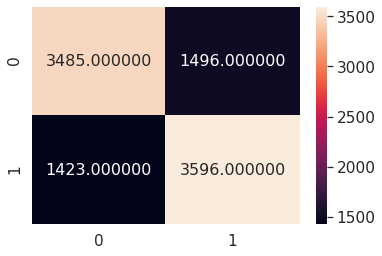

In [38]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm,annot=True,annot_kws={"size": 16},fmt='1f')# font size

In [39]:
# from xgboost import XGBClassifier
model2 = XGBClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [40]:
print(cm)

[[4032  949]
 [2061 2958]]


In [41]:
# from sklearn.metrics import  f1_score
print("f1_score(macro): {}".format(f1_score(y_test, y_pred, average="macro")))

f1_score(macro): 0.6954875216451719


In [42]:
#from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.699

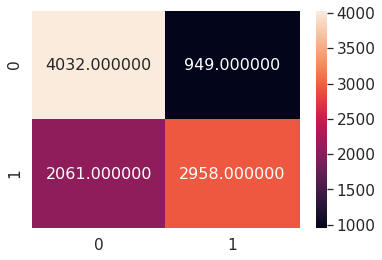

In [43]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm,annot=True,annot_kws={"size": 16},fmt='1f')# font size